Do the following exercise.

1) Clone https://github.com/adamnguyenitvn/bigdata_labs_2019

2) Open sales.ipynb

3) Make a copy of sales.ipynb, name it with your student ID

4) Do the exercise

5) Write your github username here http://socrates.io/#KFCbqAn  . We will add you to the repos for push permission

6) Check your email for github invitation

7) Push your Jupyter notebook to github

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [155]:
df = pd.read_csv('sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [156]:
df.shape

(29922, 6)

In [157]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [158]:
df['ordered_at'] = pd.to_datetime(df['ordered_at'])

In [159]:
df['price'] = pd.to_numeric(df['price'], errors='coerce');
df['line_total'] = pd.to_numeric(df['line_total'], errors='coerce');

In [160]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [161]:
df[df.duplicated()].shape[0]

584

In [162]:
df['name'].drop_duplicates()
df = df.dropna(subset=['name'])

In [163]:
df.isnull().sum()

order_id          0
name              0
ordered_at        0
price         28434
quantity          0
line_total    28434
dtype: int64

In [164]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total


#### Sanity check for value ranges and to check assumptions

In [165]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28434

In [166]:
df[df['line_total'] < 0].shape[0]

0

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [167]:
df['line_total'] = df.apply(lambda row: row['price'] * row['quantity'], axis=1)

In [168]:
df = df[df['line_total'] != '']

//anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [169]:
df.describe()

,order_id,price,quantity,line_total
count,28434.000000,0.0,28434.000000,0.0
mean,14990.710628,NaN,2.002005,NaN
std,2889.725603,NaN,0.819153,NaN
min,10000.000000,NaN,1.000000,NaN
25%,12496.000000,NaN,1.000000,NaN
50%,14965.500000,NaN,2.000000,NaN
75%,17506.750000,NaN,3.000000,NaN
max,19999.000000,NaN,3.000000,NaN


#### TODO: Get value between "" in name and put it in category column

In [170]:
df["category"] = df.apply(lambda row: row['name'].split('"')[1].lstrip()
, axis=1, result_type='expand')

In [171]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,NaN,3,NaN,ICE CREAM
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,NaN,1,NaN,ICE CREAM
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,NaN,2,NaN,SORBET
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,NaN,1,NaN,CONE
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,NaN,1,NaN,SORBET


#### Analysis, finally!

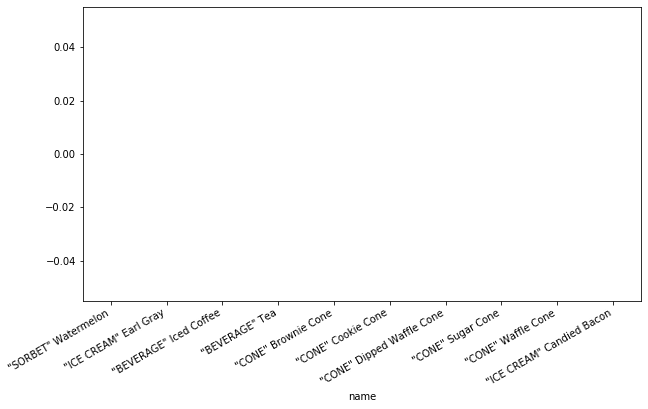

In [172]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()